In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>")) #makes the display bars longer and spread out 100% across the screen width

In [2]:
from vivarium import Artifact
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from db_queries import get_ids, get_outputs
import scipy.stats

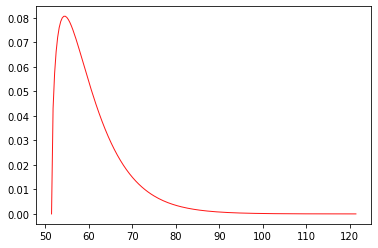

In [3]:
# distribution for the cost of BEP
loc = 51.42
mean = 60.42 - loc
a = 1.5
scale = mean/a
fig, ax = plt.subplots(1,1)
x = np.linspace(loc, loc+(120-50), 200)
ax.plot(x, scipy.stats.gamma.pdf(x, a, loc, scale), 'r-', lw=1, alpha=0.9, label='beta pdf')
plt.show()

In [4]:
%cd '/share/costeffectiveness/results/vivarium_gates_bep/summer_run3/india/2020_09_07_08_30_41'
%ls

/ihme/costeffectiveness/results/vivarium_gates_bep/summer_run3/india/2020_09_07_08_30_41
branches.yaml  keyspace.yaml             output.hdf        settings.py
count_data/    logs/                     __pycache__/
final_data/    model_specification.yaml  requirements.txt


In [5]:
run_1_output_dirs = ['/share/costeffectiveness/results/vivarium_gates_bep/summer_run1/india/2020_09_04_17_40_19/count_data/',
                  '/share/costeffectiveness/results/vivarium_gates_bep/summer_run1/mali/2020_09_04_17_51_31/count_data/',
                  '/share/costeffectiveness/results/vivarium_gates_bep/summer_run1/pakistan/2020_09_05_11_51_49/count_data/',
                  '/share/costeffectiveness/results/vivarium_gates_bep/summer_run1/tanzania/2020_09_05_11_55_58/count_data/']

run_2_output_dirs = ['/share/costeffectiveness/results/vivarium_gates_bep/summer_run2/india/2020_09_05_12_05_16/count_data/',
                    '/share/costeffectiveness/results/vivarium_gates_bep/summer_run2/mali/2020_09_05_12_09_07/count_data/',
                    '/share/costeffectiveness/results/vivarium_gates_bep/summer_run2/pakistan/2020_09_07_08_21_34/count_data/',
                    '/share/costeffectiveness/results/vivarium_gates_bep/summer_run2/tanzania/2020_09_07_08_23_52/count_data/']

run_3_output_dirs = ['/share/costeffectiveness/results/vivarium_gates_bep/summer_run3/india/2020_09_07_08_30_41/count_data/',
              '/share/costeffectiveness/results/vivarium_gates_bep/summer_run3/mali/2020_09_07_08_32_30/count_data/',
              '/share/costeffectiveness/results/vivarium_gates_bep/summer_run3/pakistan/2020_09_07_08_34_30/count_data/',
              '/share/costeffectiveness/results/vivarium_gates_bep/summer_run3/tanzania/2020_09_07_08_36_10/count_data/']

run_4_output_dirs = ['/share/costeffectiveness/results/vivarium_gates_bep/summer_run4/india/2020_09_07_08_39_06/count_data/',
                    '/share/costeffectiveness/results/vivarium_gates_bep/summer_run4/mali/2020_09_07_08_41_07/count_data/',
                    '/share/costeffectiveness/results/vivarium_gates_bep/summer_run4/pakistan/2020_09_07_08_42_41/count_data/',
                    '/share/costeffectiveness/results/vivarium_gates_bep/summer_run4/tanzania/2020_09_07_08_44_13/count_data/']

locations = ['India',
           'Mali',
           'Pakistan',
           'Tanzania']

In [6]:
def read_count_data(data_file):
    data = pd.DataFrame()
    for i in list(range(0,len(run_1_output_dirs))):
        temp1 = pd.read_hdf(run_1_output_dirs[i] + data_file + '.hdf')
        temp1['scenario'] = temp1['scenario'].replace('bep_hd_scale_up', 'bep_hd_scale_up_i').replace('bep_hd_targeted_scale_up','bep_hd_targeted_scale_up_i') 
        temp2 = pd.read_hdf(run_2_output_dirs[i] + data_file + '.hdf')
        temp3 = pd.read_hdf(run_3_output_dirs[i] + data_file + '.hdf')
        temp3['scenario'] = temp3['scenario'].replace('bep_hd_scale_up', 'bep_hd_scale_up_ii').replace('bep_hd_targeted_scale_up','bep_hd_targeted_scale_up_ii')
        temp4 = pd.read_hdf(run_4_output_dirs[i] + data_file + '.hdf')
        temp4['scenario'] = temp4['scenario'].replace('bep_hd_scale_up', 'bep_hd_scale_up_iii').replace('bep_hd_targeted_scale_up','bep_hd_targeted_scale_up_iii')
        temp = temp1.append(temp2).append(temp3).append(temp4)
        temp['location'] = locations[i]
        data = data.append(temp)
    return data

In [7]:
ylls = read_count_data('ylls')
ylds = read_count_data('ylds')
person_time = read_count_data('person_time')
population = read_count_data('population')
deaths = read_count_data('deaths')

In [8]:
result_counts = deaths.append(ylls).append(ylds)

# sum across age groups, mother status, cause, treatment group
overall_result_counts = result_counts.groupby(['input_draw','location','scenario','measure']).sum().reset_index()

# calculate dalys
dalys = overall_result_counts.reset_index().loc[overall_result_counts.reset_index().measure.isin(['ylds','ylls'])]
dalys = dalys.groupby(['input_draw','location','scenario']).sum().reset_index().drop(columns='index')
dalys['measure'] = 'dalys'
overall_result_counts = overall_result_counts.append(dalys).set_index(['input_draw','location','measure','scenario']).sort_index()

overall_result_counts.head()

/share/code/nicoly/miniconda/envs/gates_bep/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


value
input_draw location measure scenario                               
3          India    dalys   baseline                  315693.578494
                            bep_ce_scale_up           295746.818092
                            bep_ce_targeted_scale_up  299877.365618
                            bep_hd_scale_up_i         282014.887368
                            bep_hd_scale_up_ii        280700.444971

In [9]:
# test that dalys = ylls + ylds

test = overall_result_counts.reset_index()
test_ylls = test.loc[test.measure == 'ylls'].set_index(['input_draw','location','scenario']).drop(columns='measure')
test_deaths = test.loc[test.measure == 'death'].set_index(['input_draw','location','scenario']).drop(columns='measure')
test_ylds = test.loc[test.measure == 'ylds'].set_index(['input_draw','location','scenario']).drop(columns='measure')
test_dalys = test.loc[test.measure == 'dalys'].set_index(['input_draw','location','scenario']).drop(columns='measure')

assert np.all(test_ylls > test_ylds)
assert np.all(test_dalys == test_ylls + test_ylds)
assert np.all(test_ylls > test_deaths)

In [10]:
# sum across age groups, mother status, cause, treatment group

overall_births = population.loc[population.treatment_group == 'all']
overall_births = overall_births.loc[overall_births.measure == 'total_population']
overall_births = overall_births.groupby(['input_draw','location','scenario']).sum()

assert len(overall_births.value.unique()) == 1, "WARNING: number of births not the same in each scenario"
assert overall_births.value.unique()[0] == 100_000, "WARNING: number of births not equal to expected value of 100,000"

overall_births.head()

value
input_draw location scenario                          
3          India    baseline                  100000.0
                    bep_ce_scale_up           100000.0
                    bep_ce_targeted_scale_up  100000.0
                    bep_hd_scale_up_i         100000.0
                    bep_hd_scale_up_ii        100000.0

In [11]:
# averted counts
baseline_counts = (overall_result_counts.reset_index()
                   .loc[overall_result_counts.reset_index().scenario == 'baseline']
                   .drop(columns='scenario')
                   .set_index(['input_draw','location','measure']))
averted_counts = baseline_counts - overall_result_counts.reset_index().set_index(['input_draw','location','measure','scenario'])

averted_counts.head(10)

value
input_draw location measure scenario                                  
3          India    dalys   baseline                          0.000000
                            bep_ce_scale_up               19946.760402
                            bep_ce_targeted_scale_up      15816.212876
                            bep_hd_scale_up_i             33678.691126
                            bep_hd_scale_up_ii            34993.133523
                            bep_hd_scale_up_iii           35174.701565
                            bep_hd_targeted_scale_up_i    18567.009658
                            bep_hd_targeted_scale_up_ii   21370.321440
                            bep_hd_targeted_scale_up_iii  19355.061688
                            mmn_scale_up                  12743.058657

In [12]:
treatment_counts = population.loc[population.treatment_group != 'all']
treatment_counts = treatment_counts.groupby(['input_draw','location','scenario','treatment_group']).sum()

assert treatment_counts.groupby(['input_draw','location','scenario']).sum().value.unique()[0] == 100_000, "ERROR: sum of treatment counts across input draws and scenario does not equal expected value of 100,000 for all scenarios/draws"

treatment_counts.head()

value
input_draw location scenario        treatment_group         
3          India    baseline        bep                  0.0
                                    ifa              35192.0
                                    mmn                  0.0
                                    none             64808.0
                    bep_ce_scale_up bep              79789.0

In [13]:
# make cost per treatment dataframe

input_draws = treatment_counts.reset_index()['input_draw'].unique()

ifa_cost = pd.DataFrame()
ifa_cost['input_draw'] = input_draws
ifa_cost['value'] = 2.69
ifa_cost['treatment_group'] = 'ifa'

mmn_cost = pd.DataFrame()
mmn_cost['input_draw'] = input_draws
mmn_cost['value'] = 3.69
mmn_cost['treatment_group'] = 'mmn'

np.random.seed(12345)
bep_cost = pd.DataFrame()
bep_cost['input_draw'] = input_draws
bep_cost['value'] = scipy.stats.gamma.rvs(a, loc, scale, size=len(bep_cost))
bep_cost['treatment_group'] = 'bep'

none_cost = pd.DataFrame()
none_cost['input_draw'] = input_draws
none_cost['value'] = 0 #Nicole changed this to 0 from 3.69 on 13th sept. Suspect this is what's causing the diff in results
none_cost['treatment_group'] = 'none'

costs = ifa_cost.append(mmn_cost).append(bep_cost).append(none_cost).set_index(['input_draw','treatment_group'])
costs.head()

,,value
input_draw,treatment_group,
3,ifa,2.69
21,ifa,2.69
29,ifa,2.69
55,ifa,2.69
78,ifa,2.69


In [14]:
overall_costs = treatment_counts.reset_index().set_index(['input_draw','treatment_group','location','scenario']) * costs
overall_costs = overall_costs.reset_index().groupby(['input_draw','location','scenario']).sum()
overall_costs.head()

value
input_draw location scenario                              
3          India    baseline                  9.466648e+04
                    bep_ce_scale_up           4.561967e+06
                    bep_ce_targeted_scale_up  1.015672e+06
                    bep_hd_scale_up_i         4.561967e+06
                    bep_hd_scale_up_ii        4.561967e+06

In [15]:
# check ordering of costs for scenarios
test = overall_costs.reset_index()
test_baseline = test.loc[test.scenario == 'baseline'].drop(columns='scenario').set_index(['input_draw','location'])
test_mmn = test.loc[test.scenario == 'mmn_scale_up'].drop(columns='scenario').set_index(['input_draw','location'])
test_bep_ce_scale_up = test.loc[test.scenario == 'bep_ce_scale_up'].drop(columns='scenario').set_index(['input_draw','location'])
test_bep_ce_targeted_scale_up = test.loc[test.scenario == 'bep_ce_targeted_scale_up'].drop(columns='scenario').set_index(['input_draw','location'])
test_bep_hd_scale_up = test.loc[test.scenario == 'bep_hd_scale_up_i'].drop(columns='scenario').set_index(['input_draw','location'])
test_bep_hd_targeted_scale_up = test.loc[test.scenario == 'bep_hd_targeted_scale_up_i'].drop(columns='scenario').set_index(['input_draw','location'])

assert np.all(test_baseline < test_mmn)
assert np.all(test_mmn < test_bep_ce_targeted_scale_up)
assert np.all(test_bep_ce_targeted_scale_up < test_bep_ce_scale_up)
assert np.all(test_bep_ce_targeted_scale_up == test_bep_hd_targeted_scale_up)
assert np.all(test_bep_ce_scale_up == test_bep_hd_scale_up)

In [16]:
baseline_costs = (overall_costs.reset_index()
                  .loc[overall_costs.reset_index().scenario == 'baseline']
                  .drop(columns='scenario')
                  .set_index(['input_draw','location']))
incremental_costs = overall_costs - baseline_costs
incremental_costs.head()

value
input_draw location scenario                              
3          India    baseline                  0.000000e+00
                    bep_ce_scale_up           4.467301e+06
                    bep_ce_targeted_scale_up  9.210054e+05
                    bep_hd_scale_up_i         4.467301e+06
                    bep_hd_scale_up_ii        4.467301e+06

In [17]:
icers = incremental_costs / averted_counts.reset_index().set_index(['input_draw','location','scenario','measure'])
icers_summarized = icers.groupby(['location','scenario','measure']).describe(percentiles=[0.025,0.975])
icers_summarized = icers_summarized.reset_index().loc[icers_summarized.reset_index().scenario != 'baseline'].loc[icers_summarized.reset_index().measure == 'dalys']
icers_summarized.head()

location                  scenario measure value                         \
                                              count        mean        std   
4     India           bep_ce_scale_up   dalys  50.0  225.167948  57.580738   
8     India  bep_ce_targeted_scale_up   dalys  50.0   58.003906  11.806188   
12    India         bep_hd_scale_up_i   dalys  50.0  135.180719  24.346051   
16    India        bep_hd_scale_up_ii   dalys  50.0  135.019973  24.428292   
20    India       bep_hd_scale_up_iii   dalys  50.0  131.361290  24.059918   

                                                                
           min        2.5%         50%       97.5%         max  
4   148.863959  152.131099  217.118489  379.781531  396.406276  
8    38.828343   43.181756   55.194312   88.730699   96.975629  
12   99.985111  101.320844  132.389524  173.047468  237.952969  
16  100.637301  102.331352  132.767273  182.945185  243.178642  
20   96.319001  100.027520  129.581908  179.329405  233.620514

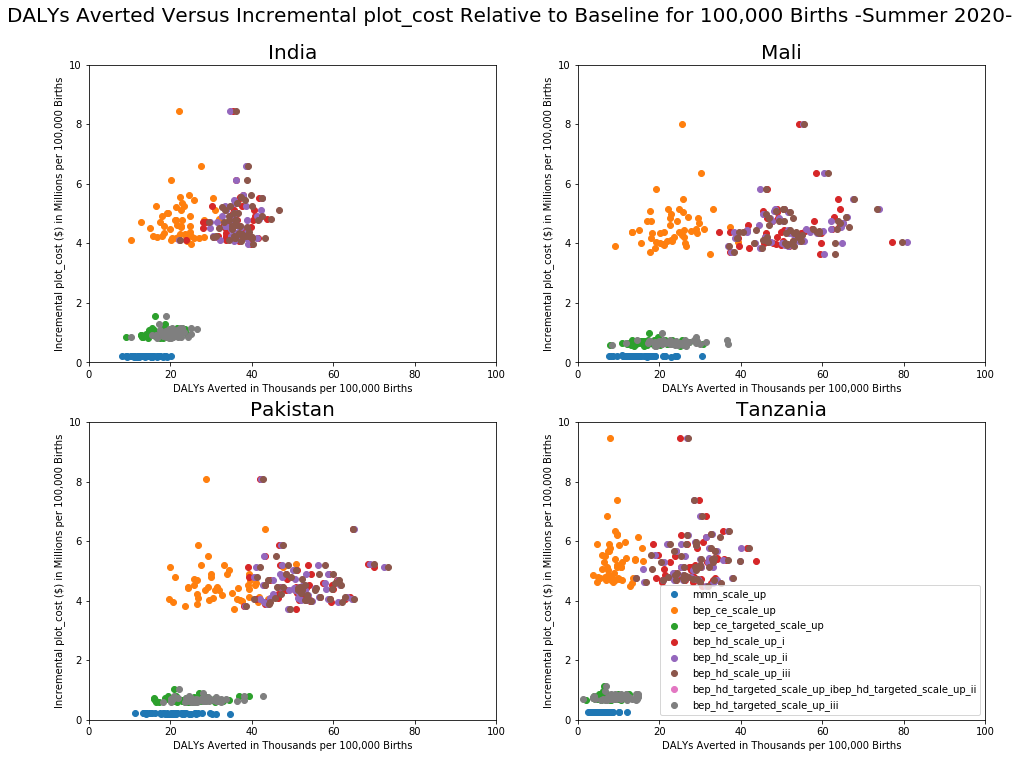

In [18]:
fig, axs = plt.subplots(2,2)

plot_dalys = averted_counts.reset_index()
plot_dalys = plot_dalys.loc[plot_dalys.scenario != 'baseline'].loc[plot_dalys.measure == 'dalys']
plot_dalys['value'] = plot_dalys['value'] / 1_000

plot_cost = incremental_costs.reset_index()
plot_cost = plot_cost.loc[plot_cost.scenario != 'baseline']
plot_cost['value'] = plot_cost['value'] / 1_000_000

ylim = 10
xlim = 100

scenarios = ['mmn_scale_up',
             'bep_ce_scale_up', 
             'bep_ce_targeted_scale_up',
             'bep_hd_scale_up_i',
             'bep_hd_scale_up_ii', 
             'bep_hd_scale_up_iii',
             'bep_hd_targeted_scale_up_i'
             'bep_hd_targeted_scale_up_ii',
             'bep_hd_targeted_scale_up_iii']

location = 'India'
for scenario in scenarios:
    axs[0,0].scatter(plot_dalys.loc[plot_dalys.location == location].loc[plot_dalys.scenario == scenario]['value'].values,
                 plot_cost.loc[plot_cost.location == location].loc[plot_cost.scenario == scenario]['value'].values)
axs[0,0].set_title(location,fontsize=20)
axs[0,0].set_ylim(0,ylim)
axs[0,0].set_xlim(0,xlim)
    
location = 'Mali'
for scenario in scenarios:
    axs[0,1].scatter(plot_dalys.loc[plot_dalys.location == location].loc[plot_dalys.scenario == scenario]['value'].values,
                 plot_cost.loc[plot_cost.location == location].loc[plot_cost.scenario == scenario]['value'].values)
axs[0,1].set_title(location,fontsize=20)
axs[0,1].set_ylim(0,ylim)
axs[0,1].set_xlim(0,xlim)
    
location = 'Pakistan'
for scenario in scenarios:
    axs[1,0].scatter(plot_dalys.loc[plot_dalys.location == location].loc[plot_dalys.scenario == scenario]['value'].values,
                 plot_cost.loc[plot_cost.location == location].loc[plot_cost.scenario == scenario]['value'].values)
axs[1,0].set_title(location,fontsize=20)
axs[1,0].set_ylim(0,ylim)
axs[1,0].set_xlim(0,xlim)
    
location = 'Tanzania'
for scenario in scenarios:
    axs[1,1].scatter(plot_dalys.loc[plot_dalys.location == location].loc[plot_dalys.scenario == scenario]['value'].values,
                 plot_cost.loc[plot_cost.location == location].loc[plot_cost.scenario == scenario]['value'].values)
axs[1,1].set_title(location,fontsize=20)
axs[1,1].set_ylim(0,ylim)
axs[1,1].set_xlim(0,xlim)

for ax in axs.flat:
    ax.set(xlabel='DALYs Averted in Thousands per 100,000 Births', 
           ylabel='Incremental plot_cost ($) in Millions per 100,000 Births')
    
plt.legend(scenarios)
plt.suptitle('DALYs Averted Versus Incremental plot_cost Relative to Baseline for 100,000 Births -Summer 2020-',x=1.1,y=2.6,fontsize=20)
plt.subplots_adjust(right=2.2, top=2.4)

[array([317.88225948, 723.06981308, 449.33864555, 407.16100312]), array([304.071656  , 707.30930158, 428.37227497, 401.1371238 ]), array([295.72937041, 699.57060652, 416.75467833, 397.9481565 ]), array([281.00382365, 669.7737253 , 396.56710378, 378.59799553]), array([300.57445952, 705.07470978, 424.66139131, 399.78682504]), array([297.62157625, 699.95724223, 422.02410299, 397.86986847])]


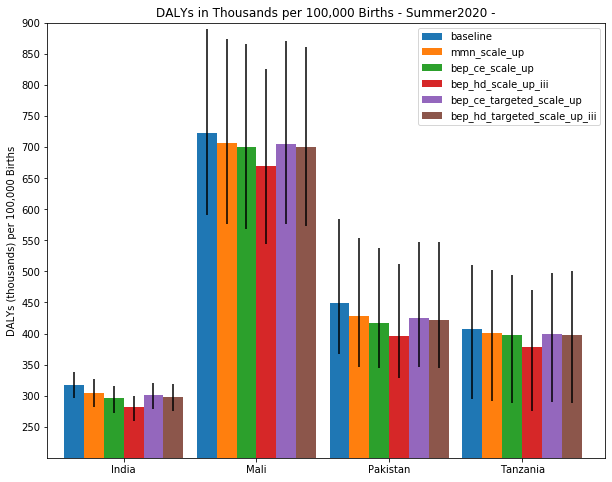

In [19]:
data = overall_result_counts.reset_index()
data = data.loc[data.measure == 'dalys']
data = data.groupby(['location','scenario']).describe(percentiles=[0.025,0.975]).reset_index()
data['value'] = data['value'] / 1_000

# bar width
barWidth = 0.15
w = 0.15

scenarios = ['baseline',
             'mmn_scale_up',
             'bep_ce_scale_up', 
             'bep_hd_scale_up_iii',
             'bep_ce_targeted_scale_up',
             'bep_hd_targeted_scale_up_iii']
             #'bep_hd_scale_up_i',
             #'bep_hd_scale_up_ii', 
             
             #'bep_hd_targeted_scale_up_i'
             #'bep_hd_targeted_scale_up_ii',
             

mean_1 = data.loc[data.scenario == scenarios[0]]['value','mean'].values
upper_1 = data.loc[data.scenario == scenarios[0]]['value','max'].values - data.loc[data.scenario == scenarios[0]]['value','mean'].values 
lower_1 = data.loc[data.scenario == scenarios[0]]['value','mean'].values - data.loc[data.scenario == scenarios[0]]['value','min'].values 

mean_2 = data.loc[data.scenario == scenarios[1]]['value','mean'].values
upper_2 = data.loc[data.scenario == scenarios[1]]['value','max'].values - data.loc[data.scenario == scenarios[1]]['value','mean'].values 
lower_2 = data.loc[data.scenario == scenarios[1]]['value','mean'].values - data.loc[data.scenario == scenarios[1]]['value','min'].values 

mean_3 = data.loc[data.scenario == scenarios[2]]['value','mean'].values
upper_3 = data.loc[data.scenario == scenarios[2]]['value','max'].values - data.loc[data.scenario == scenarios[2]]['value','mean'].values 
lower_3 = data.loc[data.scenario == scenarios[2]]['value','mean'].values - data.loc[data.scenario == scenarios[2]]['value','min'].values 

mean_4 = data.loc[data.scenario == scenarios[3]]['value','mean'].values
upper_4 = data.loc[data.scenario == scenarios[3]]['value','max'].values - data.loc[data.scenario == scenarios[3]]['value','mean'].values 
lower_4 = data.loc[data.scenario == scenarios[3]]['value','mean'].values - data.loc[data.scenario == scenarios[3]]['value','min'].values 

mean_5 = data.loc[data.scenario == scenarios[4]]['value','mean'].values
upper_5 = data.loc[data.scenario == scenarios[4]]['value','max'].values - data.loc[data.scenario == scenarios[4]]['value','mean'].values 
lower_5 = data.loc[data.scenario == scenarios[4]]['value','mean'].values - data.loc[data.scenario == scenarios[4]]['value','min'].values 

mean_6 = data.loc[data.scenario == scenarios[5]]['value','mean'].values
upper_6 = data.loc[data.scenario == scenarios[5]]['value','max'].values - data.loc[data.scenario == scenarios[5]]['value','mean'].values 
lower_6 = data.loc[data.scenario == scenarios[5]]['value','mean'].values - data.loc[data.scenario == scenarios[5]]['value','min'].values 

a = np.arange(len(mean_1))
b = [x + barWidth for x in a]
c = [x + barWidth for x in b]
d = [x + barWidth for x in c]
e = [x + barWidth for x in d]
f = [x + barWidth for x in e]

plt.figure(figsize=(10,8))
plt.bar(a, mean_1, yerr=[lower_1, upper_1], width=barWidth)
plt.bar(b, mean_2, yerr=[lower_2, upper_2], width=barWidth)
plt.bar(c, mean_3, yerr=[lower_3, upper_3], width=barWidth)
plt.bar(d, mean_4, yerr=[lower_4, upper_4], width=barWidth)
plt.bar(e, mean_5, yerr=[lower_5, upper_5], width=barWidth)
plt.bar(f, mean_6, yerr=[lower_6, upper_6], width=barWidth)

plt.yticks([250,300,350,400,450,500,550,600,650,700,750,800,850,900])
plt.legend(scenarios)
plt.xticks([r + 2.5*barWidth for r in range(len(mean_1))], data.location.unique())

plt.axis([-0.2 , 4 , 200, 900])
plt.ylabel('DALYs (thousands) per 100,000 Births')
plt.title('DALYs in Thousands per 100,000 Births - Summer2020 -')
#scenarios[1]

y = [mean_1, mean_2, mean_3, mean_4, mean_5, mean_6]
print(y)


In [20]:
# LOOKS LIKE THE ERROR BARS WERE UPSIDE DOWN IN NICOLE'S NOTEBOOK
data.loc[data.location=='Mali'].loc[data.scenario=='baseline']['value']

# see that the max value for mali baseline is almost 900, not the case for nicole's plot

,count,mean,std,min,2.5%,50%,97.5%,max
10,0.05,723.069813,61.491993,591.091266,620.989539,724.269162,879.676135,889.82966


[array([15.24215189, 14.80229932, 10.83105831, 49.92629273]), array([225.1679475 , 207.00759939, 148.46031502, 645.77291868]), array([131.36128974,  87.43164363,  89.09344785, 196.67058664]), array([ 58.00390647,  39.37550673,  29.02214586, 115.44496551]), array([ 49.24684903,  30.58577426,  25.9578365 , 100.44218069])]


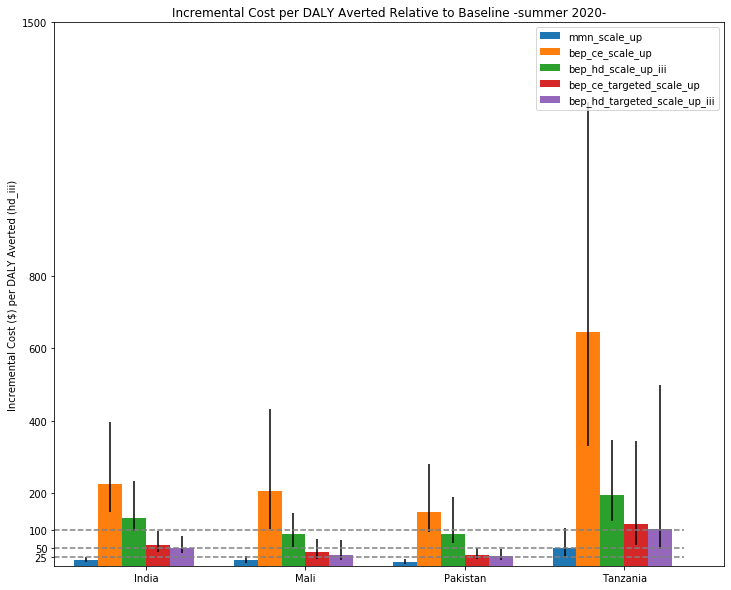

In [24]:
data = icers_summarized.reset_index()

# bar width
barWidth = 0.15
w = 0.15

scenarios = ['mmn_scale_up',
             'bep_ce_scale_up', 
             'bep_hd_scale_up_iii',
             'bep_ce_targeted_scale_up',
             'bep_hd_targeted_scale_up_iii']
             #'bep_hd_scale_up_i',
             #'bep_hd_scale_up_ii', 
             #'bep_hd_targeted_scale_up_i'
             #'bep_hd_targeted_scale_up_ii',

mean_1 = data.loc[data.scenario == scenarios[0]]['value','mean'].values
upper_1 = data.loc[data.scenario == scenarios[0]]['value','max'].values - data.loc[data.scenario == scenarios[0]]['value','mean'].values 
lower_1 = data.loc[data.scenario == scenarios[0]]['value','mean'].values - data.loc[data.scenario == scenarios[0]]['value','min'].values 

mean_2 = data.loc[data.scenario == scenarios[1]]['value','mean'].values
upper_2 = data.loc[data.scenario == scenarios[1]]['value','max'].values - data.loc[data.scenario == scenarios[1]]['value','mean'].values 
lower_2 = data.loc[data.scenario == scenarios[1]]['value','mean'].values - data.loc[data.scenario == scenarios[1]]['value','min'].values 

mean_3 = data.loc[data.scenario == scenarios[2]]['value','mean'].values
upper_3 = data.loc[data.scenario == scenarios[2]]['value','max'].values - data.loc[data.scenario == scenarios[2]]['value','mean'].values 
lower_3 = data.loc[data.scenario == scenarios[2]]['value','mean'].values - data.loc[data.scenario == scenarios[2]]['value','min'].values 

mean_4 = data.loc[data.scenario == scenarios[3]]['value','mean'].values
upper_4 = data.loc[data.scenario == scenarios[3]]['value','max'].values - data.loc[data.scenario == scenarios[3]]['value','mean'].values 
lower_4 = data.loc[data.scenario == scenarios[3]]['value','mean'].values - data.loc[data.scenario == scenarios[3]]['value','min'].values 

mean_5 = data.loc[data.scenario == scenarios[4]]['value','mean'].values
upper_5 = data.loc[data.scenario == scenarios[4]]['value','max'].values - data.loc[data.scenario == scenarios[4]]['value','mean'].values 
lower_5 = data.loc[data.scenario == scenarios[4]]['value','mean'].values - data.loc[data.scenario == scenarios[4]]['value','min'].values 

a = np.arange(len(mean_1))
b = [x + barWidth for x in a]
c = [x + barWidth for x in b]
d = [x + barWidth for x in c]
e = [x + barWidth for x in d]
f = [x + barWidth for x in e]
plt.figure(figsize=(12,10))
plt.bar(a, mean_1, yerr=[lower_1, upper_1], width=barWidth)
plt.bar(b, mean_2, yerr=[lower_2, upper_2], width=barWidth)
plt.bar(c, mean_3, yerr=[lower_3, upper_3], width=barWidth)
plt.bar(d, mean_4, yerr=[lower_4, upper_4], width=barWidth)
plt.bar(e, mean_5, yerr=[lower_5, upper_5], width=barWidth)

plt.legend(scenarios)

threshold = 100
threshold2 = 50
threshold3 = 25
plt.plot([-0.25,len(a)-.25], [threshold, threshold],'k--', c='gray')
plt.plot([-0.25,len(a)-.25], [threshold2, threshold2],'k--', c='gray')
plt.plot([-0.25,len(a)-.25], [threshold3, threshold3],'k--', c='gray')

plt.xticks([r + 2.5*barWidth for r in range(len(mean_1))], data.location.unique())
plt.axis([-0.2 , 4 , 0, 1500])
plt.yticks([25,50,100,200,400,600,800,1500])

plt.ylabel('Incremental Cost ($) per DALY Averted (hd_iii)')
plt.title('Incremental Cost per DALY Averted Relative to Baseline -summer 2020-')

y = [mean_1, mean_2, mean_3, mean_4, mean_5]
print(y)

Text(0.5, 1.0, 'Incremental Cost per DALY Averted Relative to Baseline -summer 2020-')

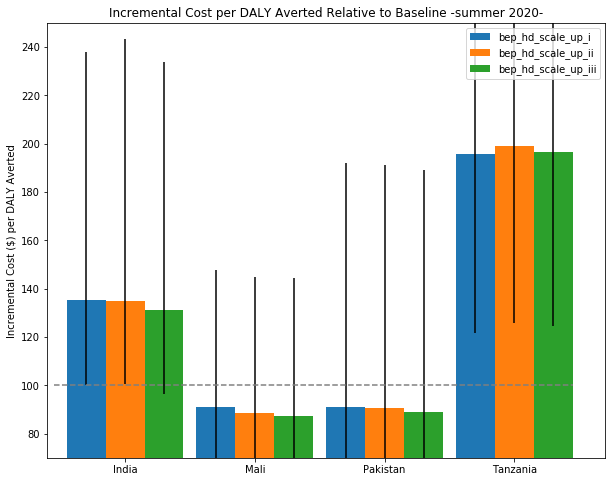

In [22]:
data = icers_summarized.reset_index()

# bar width
barWidth = 0.3
w = 0.3

scenarios = ['bep_hd_scale_up_i',
             'bep_hd_scale_up_ii',
             'bep_hd_scale_up_iii']
mean_1 = data.loc[data.scenario == scenarios[0]]['value','mean'].values
upper_1 = data.loc[data.scenario == scenarios[0]]['value','max'].values - data.loc[data.scenario == scenarios[0]]['value','mean'].values 
lower_1 = data.loc[data.scenario == scenarios[0]]['value','mean'].values - data.loc[data.scenario == scenarios[0]]['value','min'].values 

mean_2 = data.loc[data.scenario == scenarios[1]]['value','mean'].values
upper_2 = data.loc[data.scenario == scenarios[1]]['value','max'].values - data.loc[data.scenario == scenarios[1]]['value','mean'].values 
lower_2 = data.loc[data.scenario == scenarios[1]]['value','mean'].values - data.loc[data.scenario == scenarios[1]]['value','min'].values 

mean_3 = data.loc[data.scenario == scenarios[2]]['value','mean'].values
upper_3 = data.loc[data.scenario == scenarios[2]]['value','max'].values - data.loc[data.scenario == scenarios[2]]['value','mean'].values 
lower_3 = data.loc[data.scenario == scenarios[2]]['value','mean'].values - data.loc[data.scenario == scenarios[2]]['value','min'].values 

a = np.arange(len(mean_1))
b = [x + barWidth for x in a]
c = [x + barWidth for x in b]
d = [x + barWidth for x in c]
e = [x + barWidth for x in d]
f = [x + barWidth for x in e]

plt.figure(figsize=(10,8))
plt.bar(a, mean_1, yerr=[lower_1, upper_1], width=barWidth)
plt.bar(b, mean_2, yerr=[lower_2, upper_2], width=barWidth)
plt.bar(c, mean_3, yerr=[lower_3, upper_3], width=barWidth)

plt.legend(scenarios)

threshold = 100
threshold2 = 50
threshold3 = 25

plt.plot([-0.25,len(a)-.25], [threshold, threshold],'k--', c='gray')
plt.plot([-0.25,len(a)-.25], [threshold2, threshold2],'k--', c='gray')
plt.plot([-0.25,len(a)-.25], [threshold3, threshold3],'k--', c='gray')

plt.xticks([r + barWidth for r in range(len(mean_1))], data.location.unique())
#plt.axis([-0.2 , 4 , 0, 1000])
#plt.yticks([25,50,100,200,400,600,800,1000])
plt.axis([-0.3 , 4 , 70, 250])

plt.ylabel('Incremental Cost ($) per DALY Averted')
plt.title('Incremental Cost per DALY Averted Relative to Baseline -summer 2020-')

Text(0.5, 1.0, 'Incremental Cost per DALY Averted Relative to Baseline -summer 2020-')

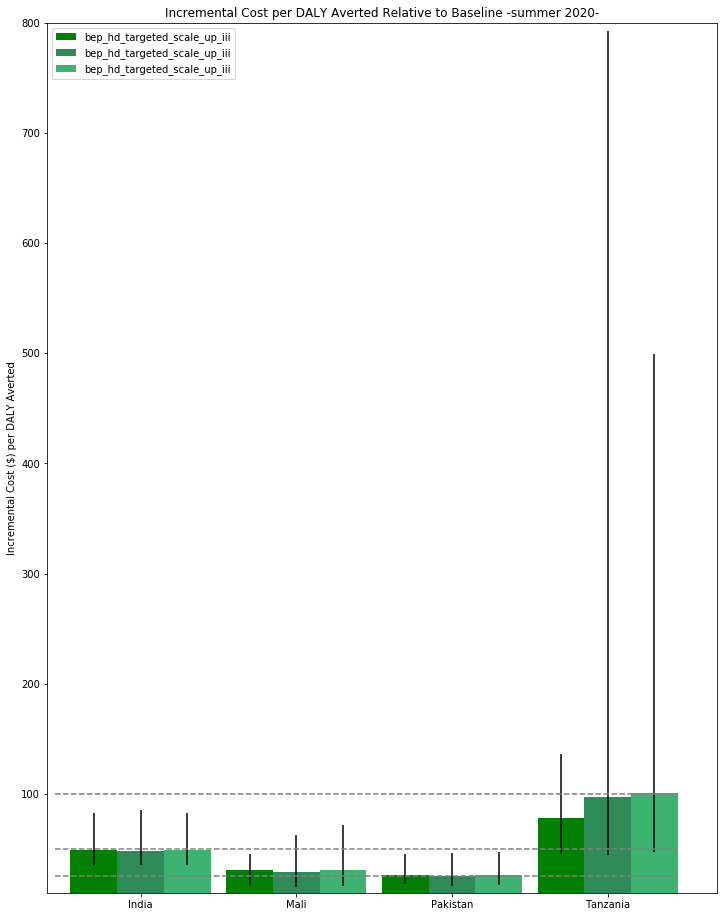

In [23]:
data = icers_summarized.reset_index()

# bar width
barWidth = 0.3
w = 0.3

scenarios = ['bep_hd_targeted_scale_up_i',
             'bep_hd_targeted_scale_up_ii',
             'bep_hd_targeted_scale_up_iii']

mean_1 = data.loc[data.scenario == scenarios[0]]['value','mean'].values
upper_1 = data.loc[data.scenario == scenarios[0]]['value','max'].values - data.loc[data.scenario == scenarios[0]]['value','mean'].values 
lower_1 = data.loc[data.scenario == scenarios[0]]['value','mean'].values - data.loc[data.scenario == scenarios[0]]['value','min'].values 

mean_2 = data.loc[data.scenario == scenarios[1]]['value','mean'].values
upper_2 = data.loc[data.scenario == scenarios[1]]['value','max'].values - data.loc[data.scenario == scenarios[1]]['value','mean'].values 
lower_2 = data.loc[data.scenario == scenarios[1]]['value','mean'].values - data.loc[data.scenario == scenarios[1]]['value','min'].values 

mean_3 = data.loc[data.scenario == scenarios[2]]['value','mean'].values
upper_3 = data.loc[data.scenario == scenarios[2]]['value','max'].values - data.loc[data.scenario == scenarios[2]]['value','mean'].values 
lower_3 = data.loc[data.scenario == scenarios[2]]['value','mean'].values - data.loc[data.scenario == scenarios[2]]['value','min'].values 

a = np.arange(len(mean_1))
b = [x + barWidth for x in a]
c = [x + barWidth for x in b]
d = [x + barWidth for x in c]
e = [x + barWidth for x in d]
f = [x + barWidth for x in e]

# plot
plt.figure(figsize=(12,16))
plt.bar(a, mean_1, yerr=[lower_1, upper_1], width=barWidth, label=scenario, color='green' )
plt.bar(b, mean_2, yerr=[lower_2, upper_2], width=barWidth,  label=scenario, color='seagreen')
plt.bar(c, mean_3, yerr=[lower_3, upper_3], width=barWidth, label=scenario, color='mediumseagreen')
 
plt.legend(loc='upper left')
threshold = 100
threshold2 = 50
threshold3 = 25
plt.plot([-0.25,len(a)-.25], [threshold, threshold],'k--', c='gray')
plt.plot([-0.25,len(a)-.25], [threshold2, threshold2],'k--', c='gray')
plt.plot([-0.25,len(a)-.25], [threshold3, threshold3],'k--', c='gray')
plt.xticks([r + barWidth for r in range(len(mean_1))], data.location.unique())

plt.axis([-0.3 , 4 , 10, 800])

plt.ylabel('Incremental Cost ($) per DALY Averted')
plt.title('Incremental Cost per DALY Averted Relative to Baseline -summer 2020-')